time        datetime64[ns, UTC]
download                float64
upload                  float64
ping                    float64
server                   object
dtype: object

time        55
download    55
upload      55
ping        55
server      55
dtype: int64



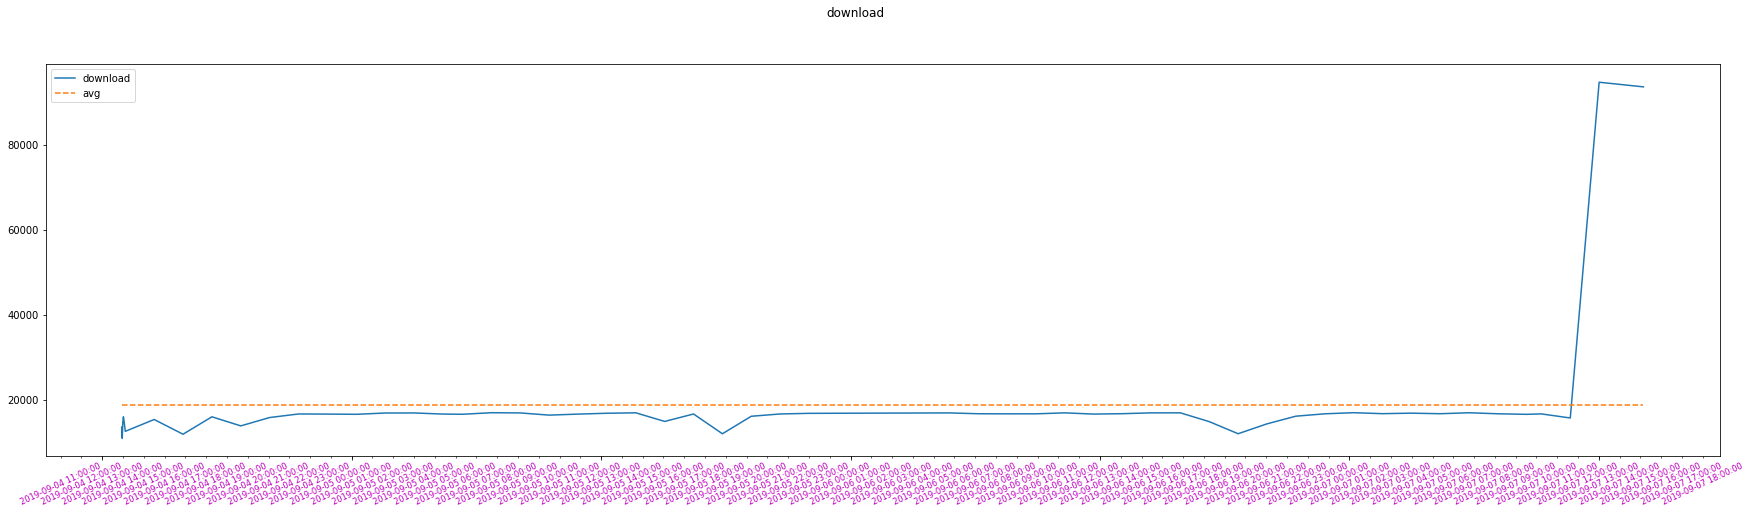

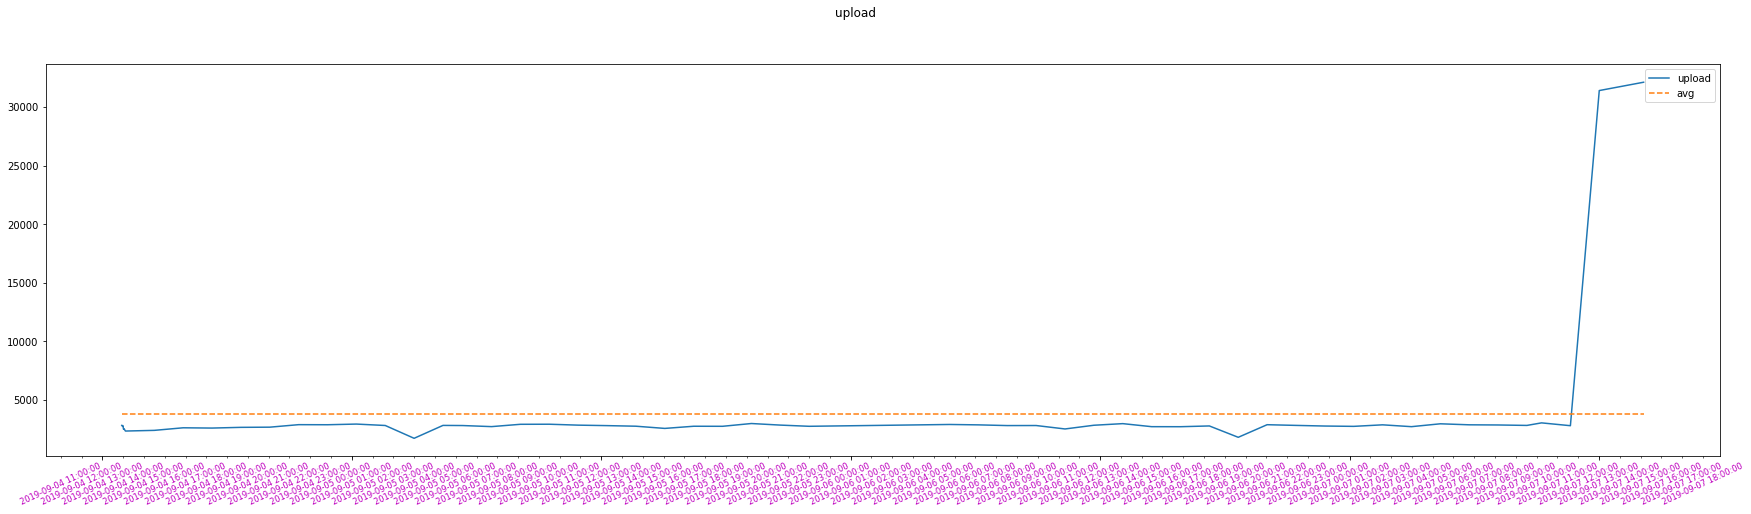

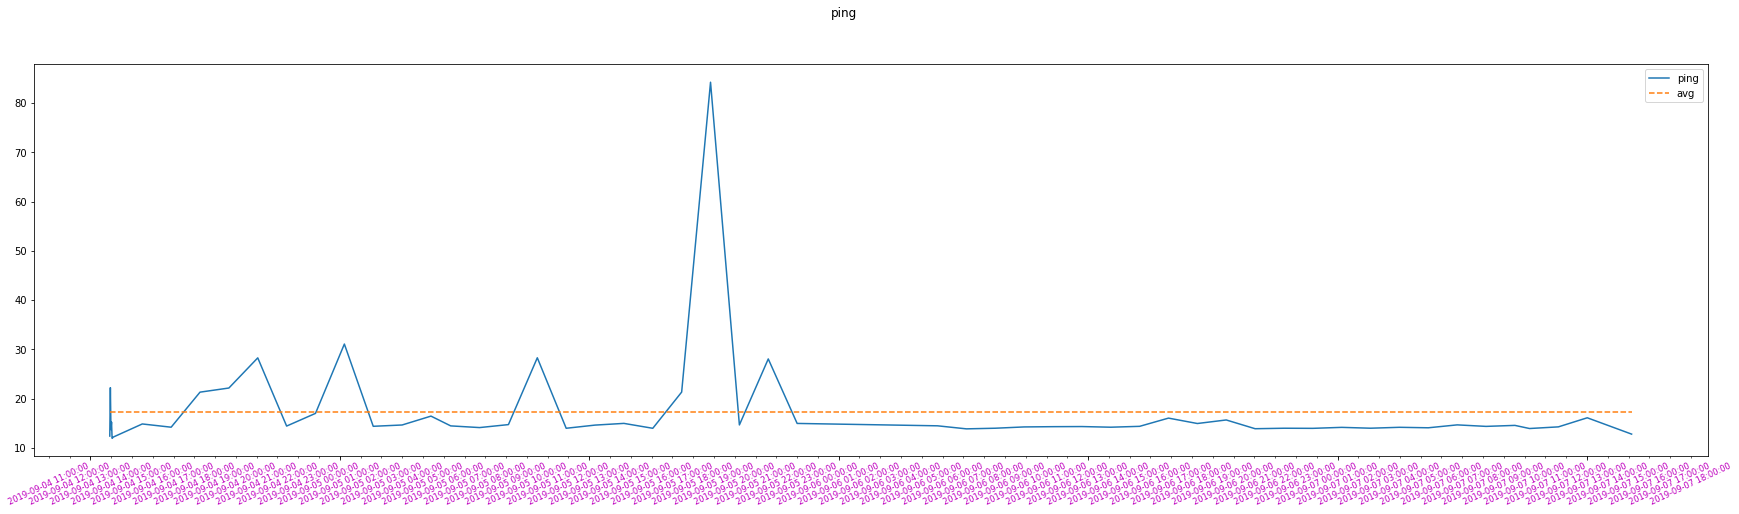

In [158]:
import os
import json 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import matplotlib.dates as md


def json_read(fname):
    with open(fname, 'r') as fp:
        return json.load(fp)


def json_save(data, fname):
    with open(fname, 'w') as fp:
        json.dump(data, fp)

def make_lineplot_overtime(dates, valuse, title):
    fig, ax = plt.subplots(figsize=(30, 8))
    fig.suptitle(title)    
    plt.subplots_adjust(bottom=0.2)
    ax.xaxis.set_minor_locator(md.HourLocator())
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_minor_formatter(md.DateFormatter('%Y-%m-%d %H:%M:%S'))    
    ax.xaxis.set_minor_locator(md.HourLocator())
    ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=25)
    ax.tick_params(axis='x', which='major', labelcolor='m', rotation=25)
    ## main line

    d_line = ax.plot(dates, values, label=title)
    ## average
    d_mean = [np.mean(values)]*values.index.size
    avg_line = ax.plot(dates, d_mean, linestyle='--', label="avg")
    legend = ax.legend()
    plt.show()

cols = [
    "time",
    "download",
    "upload",
    "ping",
    "server"
]
rows = []               
path = "out/"
for r, d, f in os.walk(path):
    for file in f:
        data = json_read(r+file)
        row = {
            "time": pandas.Timestamp(data["timestamp"]),
            "download": data["download"]/1000,
            "upload": data["upload"]/1000,
            "ping": data["ping"],
            "server": data["server"]["url"]
            }
        rows.append(row)
    break
        
df = pandas.DataFrame(rows, columns=cols)    
df = df.sort_values(by=['time'])
print(df.dtypes)
print("")
print(df.count())
print("")

dates=df.time
values=df.download
make_lineplot_overtime(dates,values, "download")
dates=df.time
values=df.upload
make_lineplot_overtime(dates,values, "upload")
dates=df.time
values=df.ping
make_lineplot_overtime(dates,values, "ping")
